In [ ]:
# load data from url
import pandas as pd

url = "https://raw.githubusercontent.com/nils-holmberg/cca-cv/main/edu/sfac-simm71/cv-project-data.tsv"
df = pd.read_csv(url, sep="\t", header=None)
df.head(3)

In [10]:
# save data from url
import urllib.request

for index, url in df.iterrows():
  fp = "".join(["image-", str(index), ".jpg"])
  urllib.request.urlretrieve(url[0], fp)

In [ ]:
# save data from zip
import urllib.request

url = "https://docs.google.com/uc?export=download&id=1dyfgS_WM6bkrBBZ8ZiPN5QsqaO199DLh"
fp = "cv-project-data.zip"
urllib.request.urlretrieve(url, fp)

In [ ]:
# load data from dir
import os

for img in os.listdir("cv-project-data"):
  fn = os.fsdecode(img)
  print(fn)

In [ ]:
# check if linux environment
!uname -a

Linux 02a2b944f51a 5.10.133+ #1 SMP Fri Aug 26 08:44:51 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux


# video processing

In [ ]:
# load data from google drive
#from google.colab import drive
#drive.mount('/content/drive')
#fp = "/content/drive/MyDrive/Colab Notebooks/simm71/cv/clip.mp4"

Mounted at /content/drive


In [ ]:
# load data from url
import urllib.request
url = "https://raw.githubusercontent.com/nils-holmberg/cca-cv/main/vid/clip.mp4"
fp = "clip.mp4"
urllib.request.urlretrieve(url, fp)

('clip.mp4', <http.client.HTTPMessage at 0x7fda7b642f10>)

In [ ]:
# separate video frames
!ffmpeg -i "clip.mp4" -vf "select=not(mod(n\,100))" -vsync vfr -q:v 2 "./vid-sep-%06d.jpg"

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

# image similarity

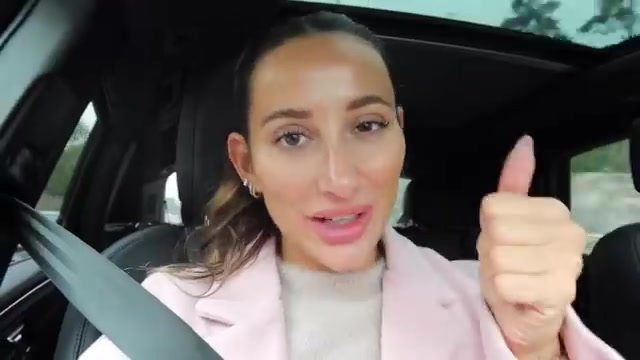

In [ ]:
# load video frame as image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("vid-sep-000001.jpg")
cv2_imshow(img)

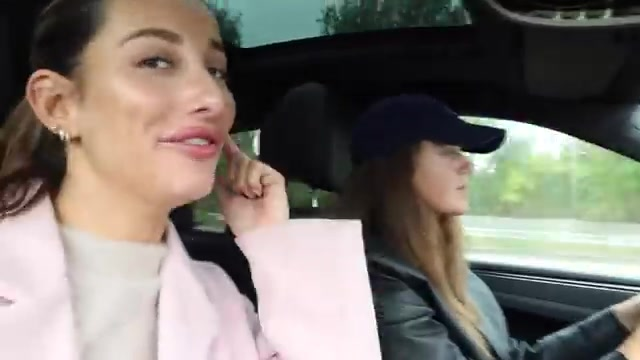

In [ ]:
new = cv2.imread("vid-sep-000002.jpg")
cv2_imshow(new)

In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray
ref_image = imread('avion.bmp')
ref_image = rgb2gray(ref_image)
impaired_image = imread('avion_jpeg_r5.bmp')
impaired_image = rgb2gray(impaired_image)

structural_similarity(ref_image, impaired_image, multichannel=True, gaussian_weights=True, sigma=1.5, use_sample_covariance=False, data_range=1.0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.color import rgb2gray
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

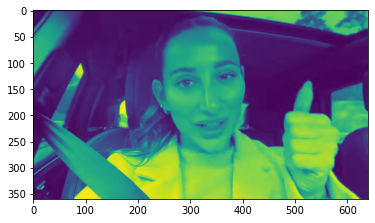

In [ ]:
ref_image = imread('vid-sep-000001.jpg')
ref_image = rgb2gray(ref_image)
ref_image = img_as_float(ref_image)
#ref_image.shape
plt.imshow(ref_image)

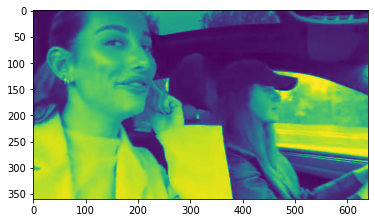

In [ ]:
new_image = imread('vid-sep-000002.jpg')
new_image = rgb2gray(new_image)
new_image = img_as_float(new_image)
#new_image.shape
plt.imshow(new_image)

In [ ]:
rows, cols = ref_image.shape

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mean_squared_error(ref_image, ref_image)
ssim_none = ssim(ref_image, ref_image, data_range=ref_image.max()-ref_image.min())

mse_new = mean_squared_error(ref_image, new_image)
ssim_new = ssim(ref_image, new_image, data_range=new_image.max()-new_image.min())

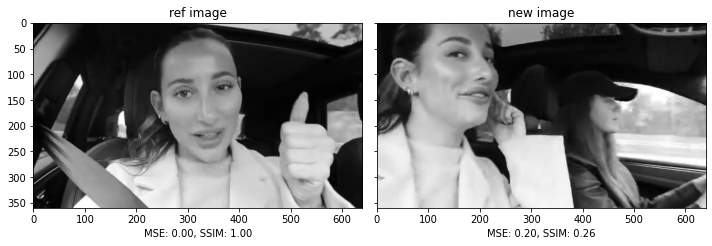

In [ ]:
ax[0].imshow(ref_image, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_none:.2f}, SSIM: {ssim_none:.2f}')
ax[0].set_title('ref image')

ax[1].imshow(new_image, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_new:.2f}, SSIM: {ssim_new:.2f}')
ax[1].set_title('new image')

plt.tight_layout()
plt.show()

# difference image

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from skimage import data, transform, exposure
from skimage.util import compare_images

img1 = ref_image
img2 = new_image

diff_rotated = compare_images(img1, img2, method='diff')

[]

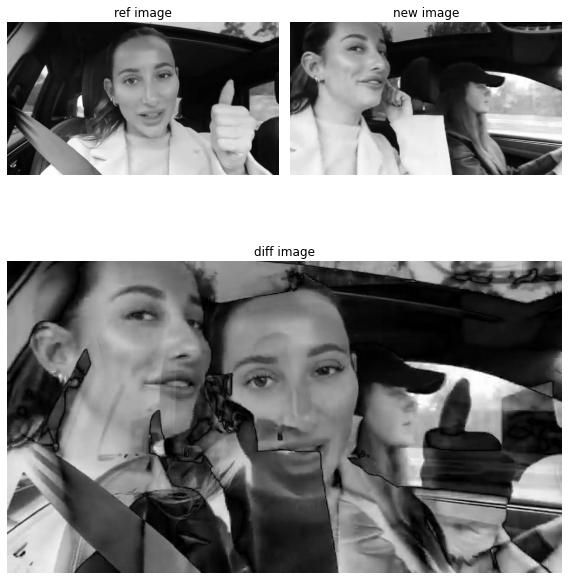

In [ ]:
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('ref image')
ax1.imshow(img2, cmap='gray')
ax1.set_title('new image')
ax2.imshow(diff_rotated, cmap='gray')
ax2.set_title('diff image')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
plt.plot()

# face detection

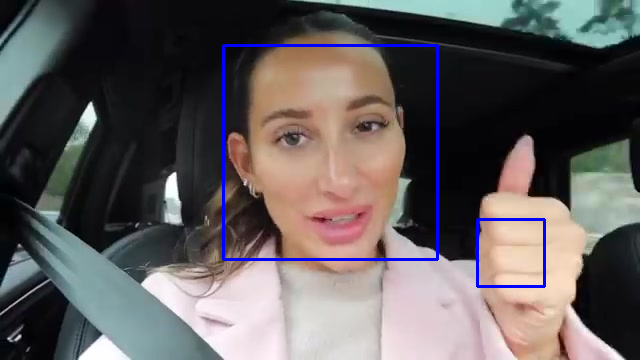

In [ ]:
import cv2

# Load the cascade
#face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# Read the input image
img = cv2.imread('vid-sep-000001.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output
#cv2.imshow('img', img)
#cv2.waitKey()
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
cv2.imwrite("haar-face.png", img)

True

# object recognition

In [ ]:
!pip install -q transformers
!pip install -q timm
from transformers import pipeline
model = pipeline("object-detection")

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


Downloading:   0%|          | 0.00/274 [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/detr/image_processing_detr.py:773: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


In [ ]:
model("vid-sep-000002.jpg")

[{'score': 0.9941784143447876,
  'label': 'person',
  'box': {'xmin': 0, 'ymin': 0, 'xmax': 290, 'ymax': 358}},
 {'score': 0.9859976768493652,
  'label': 'person',
  'box': {'xmin': 341, 'ymin': 92, 'xmax': 639, 'ymax': 358}}]